In [5]:
import tensorflow as tf
config = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)    
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.90
sess = tf.Session(config = config)

import pickle
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.xception import Xception


In [2]:
from Model import *
from Utils import *
from imblearn.over_sampling import *


NUM_EXECUTIONS = 10
BATCH_SIZE = 32
INCLUDE_CEILOMETER = False

experiment_ceil_text = "ceil"
if not INCLUDE_CEILOMETER:
    experiment_ceil_text = "no_ceil"

file_dir = "data"
model_dir = "results"

# TODO 
data = load_data(file_dir, oversampler=RandomOverSampler())

data_generator = make_data_generator(data['train'])



Using TensorFlow backend.


RandomOverSampler oversampling
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
Label train set shape: 7932, 12
Label valid set shape: 461, 12
Label test set shape: 923, 12

Image train set shape: 7932, 256, 256, 3
Image valid set shape: 461, 256, 256, 3
Image test set shape: 923, 256, 256, 3


In [ ]:
# https://github.com/keras-team/keras/issues/2131
model_name = 'vgg19_%s' % experiment_ceil_text
model, model_file_name = fit_model(data['train'], data['valid'], data_generator, 
                                   make_prebuilt(VGG19,.1, include_ceilometer=False), 
                                   model_name=model_name, model_dir=model_dir, 
                                   batch_size=BATCH_SIZE, include_ceilometer=INCLUDE_CEILOMETER, max_epochs=2)

save_results(model_dir, model_file_name, data, data_generator, include_ceilometer=INCLUDE_CEILOMETER)



In [ ]:
model_name = 'inceptionresnetv2_%s' % experiment_ceil_text
model, model_file_name = fit_model(data['train'], data['valid'], data_generator,
                                   make_prebuilt(InceptionResNetV2,.25, include_ceilometer=False), 
                                   model_name=model_name,model_dir=model_dir, batch_size=BATCH_SIZE, 
                                   include_ceilometer=INCLUDE_CEILOMETER)
save_results(model_dir, model_file_name, data, data_generator, include_ceilometer=INCLUDE_CEILOMETER)


In [ ]:
model_name = 'inceptionv3_%s' % experiment_ceil_text
model, model_file_name = fit_model(data['train'], data['valid'], data_generator,
                        make_prebuilt(InceptionV3,.1, include_ceilometer=False), model_name=model_name,
                        model_dir=model_dir, batch_size=BATCH_SIZE, include_ceilometer=INCLUDE_CEILOMETER)

save_results(model_dir, model_file_name, data, data_generator, include_ceilometer=INCLUDE_CEILOMETER)



Unpacking train and validation tests
Building the network
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
74842112/74836368 [==============================] - 48s 1us/step
Compiling the network
Layers: 711
Fitting the network 1
Epoch 1/1000
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
248/247 [==============================] - 268s 1s/step - loss: 0.9654 - acc: 0.6672 - val_loss: 1.4876 - val_acc: 0.5206
Epoch 2/1000
248/247 [==============================] - 96s 388ms/step - loss: 0.5453 - acc: 0.8076 - val_loss: 2.0253 - val_acc: 0.4490
Epoch 3/1000
248/247 [==============================] - 96s 389ms/step - loss: 0.4599 - acc: 0.8398 - val_loss: 1.8770 - val_acc: 0.4273
Epoch 4/1000
248/247 [==============================] - 96s 387ms/step - loss: 0.4051 - acc: 0.8596 - val_loss: 2.2095 - val_acc: 0.4187
Epoch 5/1000
248/247 [==============================] - 96s 38

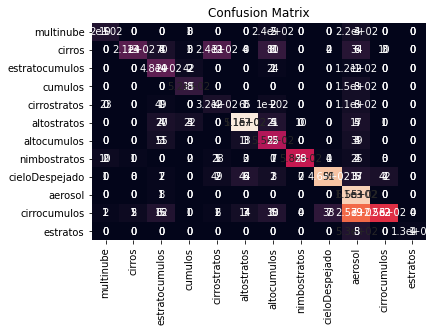

In [3]:
model_name = 'densenet201_%s' % experiment_ceil_text
model, model_file_name = fit_model(data['train'], data['valid'], data_generator,
                        make_prebuilt(DenseNet201,.25, include_ceilometer=False), model_name=model_name,
                        model_dir=model_dir, batch_size=BATCH_SIZE, include_ceilometer=INCLUDE_CEILOMETER)

save_results(model_dir, model_file_name, data, data_generator, include_ceilometer=INCLUDE_CEILOMETER)



In [6]:
model_name = 'xceptionv1_%s' % experiment_ceil_text
model, model_file_name = fit_model(data['train'], data['valid'], data_generator,
                        make_prebuilt(Xception,.25, include_ceilometer=False), model_name=model_name,
                        model_dir=model_dir, batch_size=BATCH_SIZE, include_ceilometer=INCLUDE_CEILOMETER)

save_results(model_dir, model_file_name, data, data_generator, include_ceilometer=INCLUDE_CEILOMETER)



Unpacking train and validation tests
Building the network
83689472/83683744 [==============================] - 47s 1us/step
Compiling the network
Layers: 136
Fitting the network 1
Epoch 1/1000
248/247 [==============================] - 173s 697ms/step - loss: 1.0557 - acc: 0.6459 - val_loss: 2.8130 - val_acc: 0.1410
Epoch 2/1000
248/247 [==============================] - 91s 367ms/step - loss: 0.5519 - acc: 0.8099 - val_loss: 3.3244 - val_acc: 0.1323
Epoch 3/1000
248/247 [==============================] - 92s 372ms/step - loss: 0.4444 - acc: 0.8462 - val_loss: 3.9354 - val_acc: 0.1692
Epoch 4/1000
248/247 [==============================] - 91s 366ms/step - loss: 0.3859 - acc: 0.8618 - val_loss: 4.0302 - val_acc: 0.1692
Epoch 5/1000
248/247 [==============================] - 91s 366ms/step - loss: 0.3275 - acc: 0.8851 - val_loss: 5.0050 - val_acc: 0.1627
Epoch 6/1000
248/247 [==============================] - 91s 367ms/step - loss: 0.3066 - acc: 0.8893 - val_loss: 7.6541 - val_acc: 0.14

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

